# 1. Setting Up Environment and Dependencies

In [1]:
!pip install opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.62.2
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.4
ipython                      8.24.0
jedi                         

In [3]:
import tensorflow as tf
import os

In [4]:
# Prevent running out of memory (OOM) by limiting GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Importing and Preparing the Dataset

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('CK+ dataset')

Found 928 files belonging to 6 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

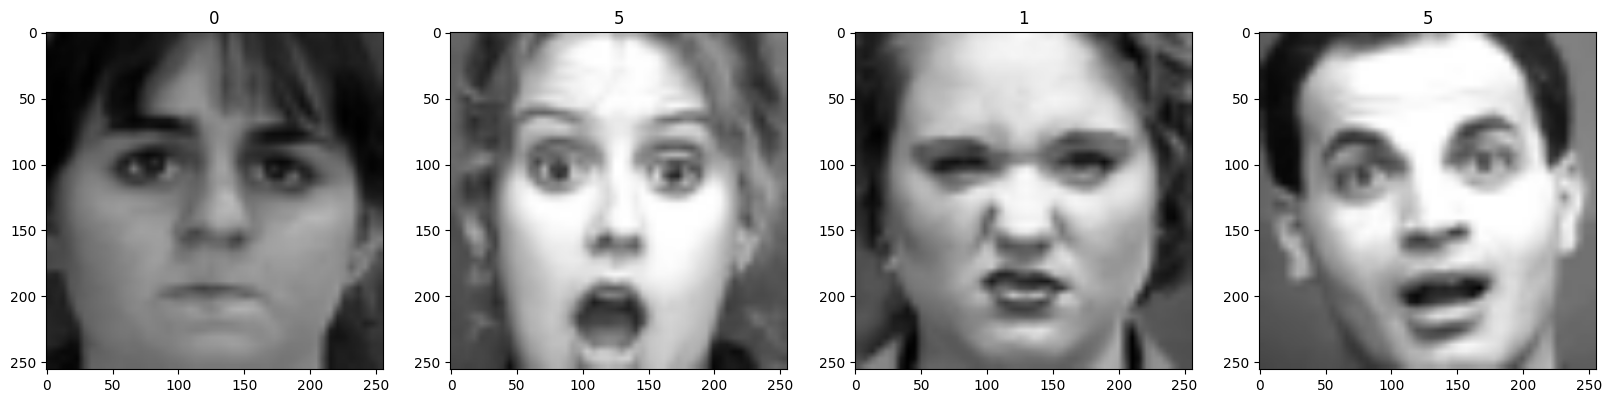

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Normalizing and Preprocessing the Data

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.05882353, 0.05882353, 0.05882353],
          [0.05882353, 0.05882353, 0.05882353],
          [0.05882353, 0.05882353, 0.05882353],
          ...,
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471]],
 
         [[0.05882353, 0.05882353, 0.05882353],
          [0.05882353, 0.05882353, 0.05882353],
          [0.05882353, 0.05882353, 0.05882353],
          ...,
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471]],
 
         [[0.05882353, 0.05882353, 0.05882353],
          [0.05882353, 0.05882353, 0.05882353],
          [0.05882353, 0.05882353, 0.05882353],
          ...,
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471]],
 
         ...,
 
         [[0.10588235, 0.10588235, 0.10588235],
          [0.10588

# 4. Partitioning Data into Training, Validation, and Test Sets

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

20

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Designing the Convolutional Neural Network (CNN) Architecture

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  

In [20]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 6. Training the CNN Model on the Training Data

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
20/20 [==============================] - 8s 164ms/step - loss: 1.6560 - accuracy: 0.3703 - val_loss: 1.4434 - val_accuracy: 0.6313
Epoch 2/20
20/20 [==============================] - 3s 142ms/step - loss: 1.0102 - accuracy: 0.6781 - val_loss: 0.7953 - val_accuracy: 0.7812
Epoch 3/20
20/20 [==============================] - 3s 133ms/step - loss: 0.4533 - accuracy: 0.8750 - val_loss: 0.2507 - val_accuracy: 0.9250
Epoch 4/20
20/20 [==============================] - 3s 127ms/step - loss: 0.1832 - accuracy: 0.9453 - val_loss: 0.1252 - val_accuracy: 0.9500
Epoch 5/20
20/20 [==============================] - 3s 133ms/step - loss: 0.1101 - accuracy: 0.9688 - val_loss: 0.0629 - val_accuracy: 0.9937
Epoch 6/20
20/20 [==============================] - 3s 129ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 3s 125ms/step - loss: 0.0240 - accuracy: 0.9906 - val_loss: 0.0359 - val_accuracy: 0.9937
Epoch 

# 7. Visualizing Model Performance Metrics during Training

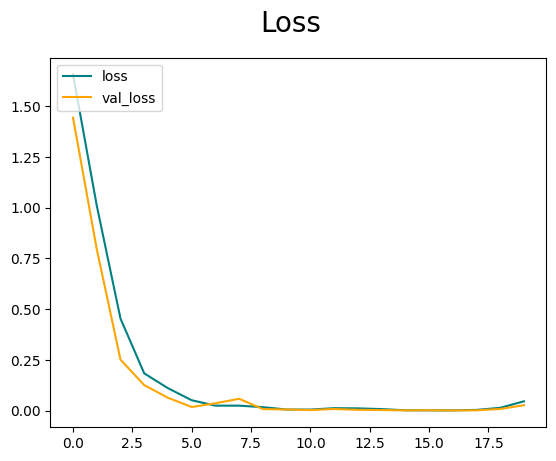

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

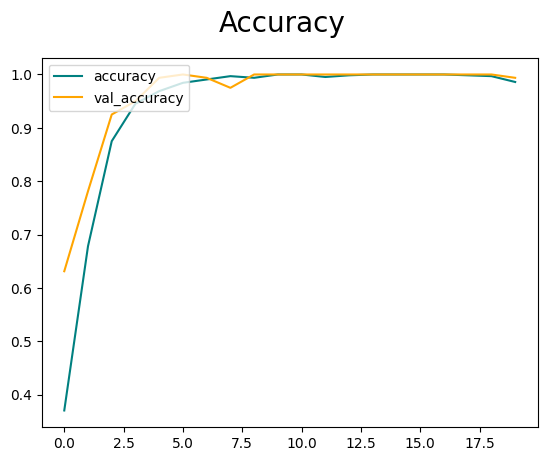

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluating the Trained Model's Performance on the Validation Set

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [29]:
# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
y_true = []
y_pred = []

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Get the predicted class indices
    predicted_class_indices = np.argmax(yhat, axis=1)
    
    # Extend true and predicted labels
    y_true.extend(y)
    y_pred.extend(predicted_class_indices)

In [32]:
# Calculate evaluation metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

In [33]:
print("Evaluation Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Precision: 0.9853515625
Recall: 0.984375
F1 Score: 0.9835109447004609
Accuracy: 0.984375
Confusion Matrix:
[[ 7  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  0 17]]


# 9. Assessing Model Performance on Unseen Test Data

In [34]:
import cv2

In [35]:
img = cv2.imread('h.png')

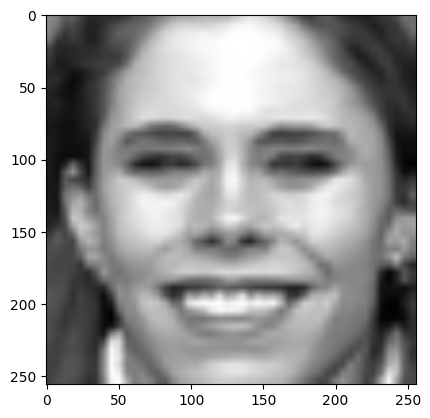

In [36]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print("Predicted probabilities:", yhat)

Predicted probabilities: [[3.1615383e-07 1.8522107e-04 7.2240049e-04 9.9909186e-01 6.3605770e-09
  2.6653231e-07]]


In [38]:
predicted_class_index = np.argmax(yhat)

In [39]:
emotion_classes = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Sad', 'Surprised']

In [40]:
print("Predicted class is:", emotion_classes[predicted_class_index])

Predicted class is: Happy


# 10. Saving the Trained Model for Future Use or Deployment

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','cnn.h5'))

In [43]:
new_model = load_model('models\cnn.h5')

In [44]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[3.1615383e-07, 1.8522107e-04, 7.2240049e-04, 9.9909186e-01,
        6.3605770e-09, 2.6653231e-07]], dtype=float32)